# Linear Regression from Scratch on California Housing dataset

### Data Loading

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['HouseValuation'] = california.target

In [2]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseValuation
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MedInc          20640 non-null  float64
 1   HouseAge        20640 non-null  float64
 2   AveRooms        20640 non-null  float64
 3   AveBedrms       20640 non-null  float64
 4   Population      20640 non-null  float64
 5   AveOccup        20640 non-null  float64
 6   Latitude        20640 non-null  float64
 7   Longitude       20640 non-null  float64
 8   HouseValuation  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseValuation
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Upon looking the statistics of the dataset, we see that it needs standardization as the scales of features are quite different from each other. We need to ensure our gradient descent works well and converges without taking longer. Also scaling ensures that all the features contribute equally to the cost function.

We can also see that from these standard deviation values. Feautres with very different std may need scaling. In this case Standardization (scaling to mean = 0, std = 1) can be useful for us.

In [5]:
df.isnull().sum()

MedInc            0
HouseAge          0
AveRooms          0
AveBedrms         0
Population        0
AveOccup          0
Latitude          0
Longitude         0
HouseValuation    0
dtype: int64

No null values in dataset, nice.

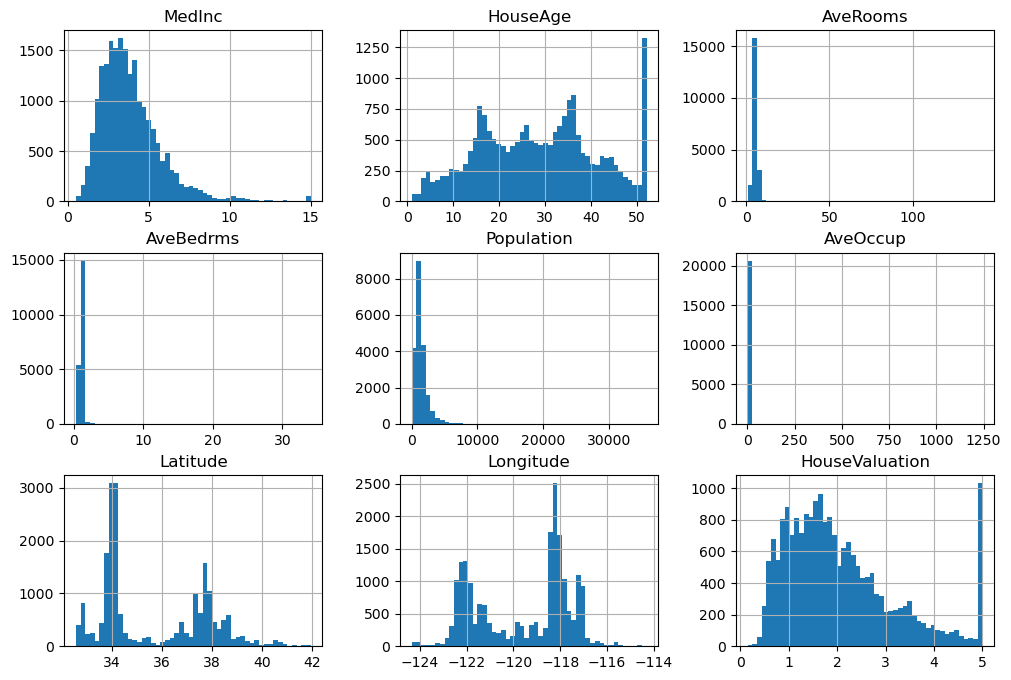

In [6]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(12,8))
plt.show()

As we can see from the histograms, the distributions of the features are very different (e.g, Population is spread out while AveRooms is tightly clustered.), thus scaling can help big time.

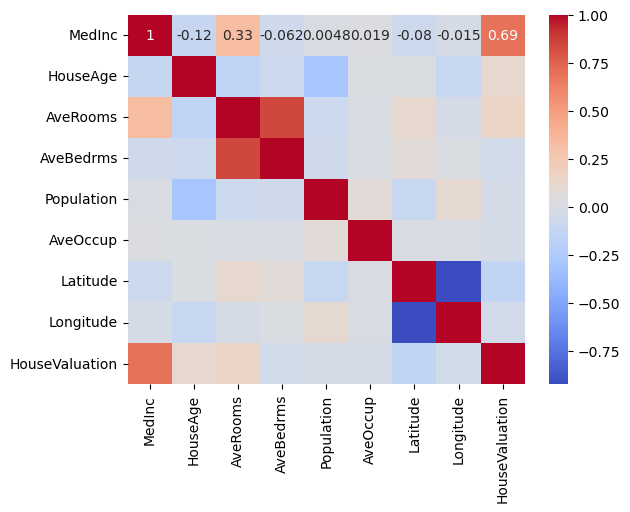

In [7]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

If features are on different scales, the correlation matrix may not accurately reflect relationships between features.

### Data Preprocessing

In [8]:
from utils.split import train_test_split

X = df.drop("HouseValuation", axis=1)
y = df["HouseValuation"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [9]:
from utils.z_score_normalization import z_score_normalize

X_train_normalized, train_mean, train_std = z_score_normalize(X_train)
X_test_normalized = (X_test - train_mean) / train_std

y_train_reshaped = y_train.reshape(-1, 1)  # We need to reshape y_train set as it's a 1D array (n_samples,), but X_train didn't need reshaping as it's already a 2D array (n_samples, n_features)
y_test_reshaped = y_test.reshape(-1, 1)

y_train_normalized, y_mean, y_std = z_score_normalize(y_train_reshaped)
y_test_normalized = (y_test_reshaped - y_mean) / y_std

In [10]:
print("X_train_normalized shape:", X_train_normalized.shape)
print("y_train_normalized shape:", y_train_normalized.shape)
print("y_train_normalized:", y_train_normalized.shape)

X_train_normalized shape: (16512, 8)
y_train_normalized shape: (16512, 1)
y_train_normalized: (16512, 1)


In [11]:
from linear_regression import LinearRegression

model = LinearRegression(learning_rate=0.01, n_iterations=1000)
y_train_normalized = y_train_normalized.ravel()
model.fit(X_train_normalized, y_train_normalized)

1 iteration, weight: [ 0.01381293  0.00207413  0.0031697  -0.00102702 -0.00052065 -0.0004406
 -0.00285967 -0.00092698] 
1 iteration, bias: 3.4425520143415706e-19 
1 iteration, loss: 1.0
2 iteration, weight: [ 0.02732741  0.0041443   0.006212   -0.00205912 -0.00102016 -0.00087789
 -0.00566488 -0.00187618] 
2 iteration, bias: -5.981434124918478e-19 
2 iteration, loss: 0.9786635453489866
3 iteration, weight: [ 0.0405503   0.00620953  0.00913143 -0.00309454 -0.00149901 -0.00131186
 -0.00841725 -0.00284638] 
3 iteration, bias: -3.1671478531942454e-18 
3 iteration, loss: 0.9582407689011749
4 iteration, weight: [ 0.05348833  0.00826887  0.01193235 -0.00413164 -0.00195766 -0.00174249
 -0.01111837 -0.0038364 ] 
4 iteration, bias: -7.53918891140804e-18 
4 iteration, loss: 0.9386895978991655
5 iteration, weight: [ 0.06614803  0.01032144  0.01461895 -0.00516887 -0.00239656 -0.00216976
 -0.01376975 -0.00484511] 
5 iteration, bias: -1.3981064368244704e-17 
5 iteration, loss: 0.9199700487649393
6 ite

In [13]:
y_pred = model.predict(X_test_normalized)


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

#TODO: Fix dimension problem

ValueError: can only specify one unknown dimension